# Image Classification of CIFAR-10 Dataset

CIFAR-10  is an established computer-vision dataset used for object recognition. 

The goal of this project is to build and train a CNN model that can accurately classify the images into their respective classes(like Airplane, bird, cat, dog, car, etc.).

# Step 1: Dataset Preparation

## Import the necsessary libraries

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the CIFAR-10 Dataset

## Split the Dataset into Training and Test set

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test/ 255.0

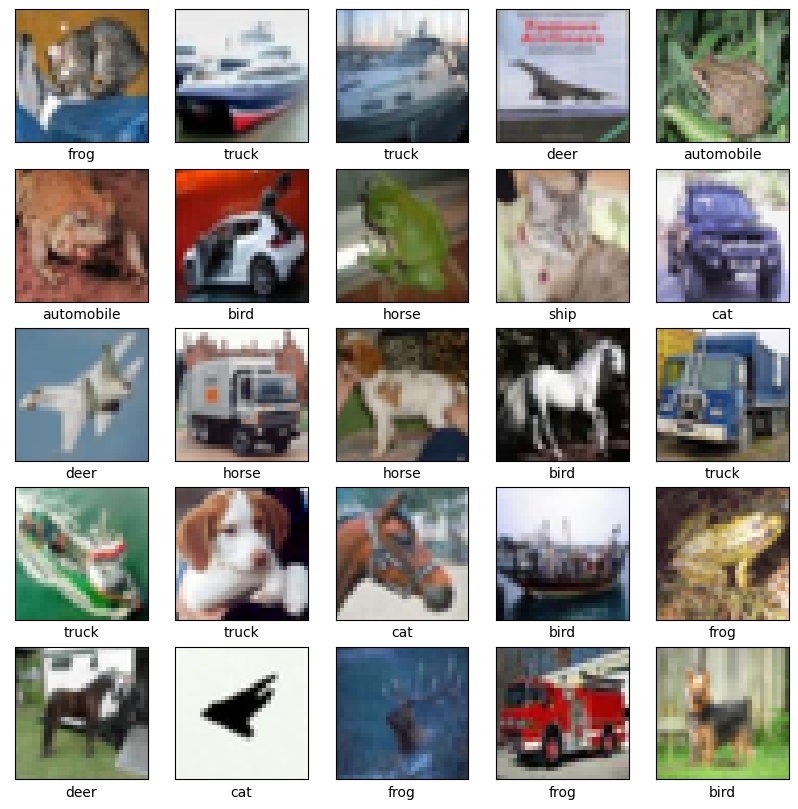

In [4]:
#Show First 25 images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# Step 2 : Model Architecture and Training

## Design a Convolutional Neural Network(CNN) Model

### Initialize CNN Model

In [6]:
cnn = keras.Sequential()

### Convolution Layer

In [7]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

### Pooling Layer

In [8]:
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

### Dropout Layer used for Overfitting

In [9]:
cnn.add(layers.Dropout(0.2))

### Adding a second convolutional layer

In [10]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

In [11]:
cnn.add(layers.Dropout(0.2))

### Flattening layer

In [12]:
cnn.add(layers.Flatten())

### Fully Connected Layer

In [13]:
cnn.add(layers.Dense(128, activation="relu"))

In [14]:
cnn.add(layers.Dropout(0.5))

### Output layer

In [15]:
cnn.add(layers.Dense(units=10, activation='sigmoid'))

### Build Model

In [16]:
cnn.build(input_shape=(None,32,32,3))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                   

## Compile the CNN Model

In [17]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Train a CNN Model

In [18]:
history = cnn.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20


2023-07-07 01:09:24.043908: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


352/352 [==============================] - 54s 151ms/step - loss: 1.7478 - accuracy: 0.3528 - val_loss: 1.3706 - val_accuracy: 0.5216
Epoch 2/20
352/352 [==============================] - 53s 150ms/step - loss: 1.3984 - accuracy: 0.4950 - val_loss: 1.2154 - val_accuracy: 0.5756
Epoch 3/20
352/352 [==============================] - 53s 151ms/step - loss: 1.2535 - accuracy: 0.5546 - val_loss: 1.0374 - val_accuracy: 0.6348
Epoch 4/20
352/352 [==============================] - 53s 150ms/step - loss: 1.1605 - accuracy: 0.5877 - val_loss: 0.9958 - val_accuracy: 0.6532
Epoch 5/20
352/352 [==============================] - 52s 149ms/step - loss: 1.0913 - accuracy: 0.6133 - val_loss: 0.9276 - val_accuracy: 0.6824
Epoch 6/20
352/352 [==============================] - 54s 155ms/step - loss: 1.0374 - accuracy: 0.6326 - val_loss: 0.8875 - val_accuracy: 0.6950
Epoch 7/20
352/352 [==============================] - 53s 150ms/step - loss: 1.0049 - accuracy: 0.6439 - val_loss: 0.8822 - val_accuracy: 0.6

## Monitor the Training Process by evaluating the model performance on Validation set at regular intervals

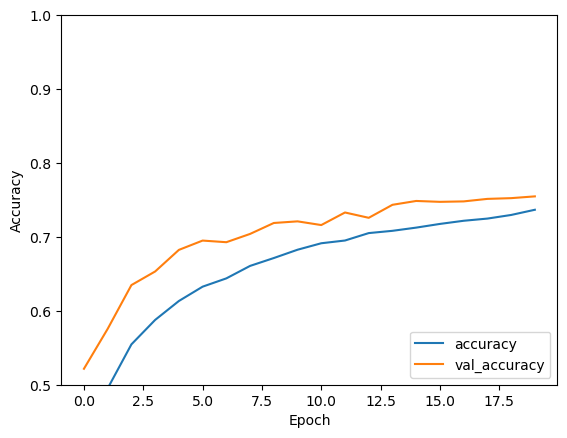

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

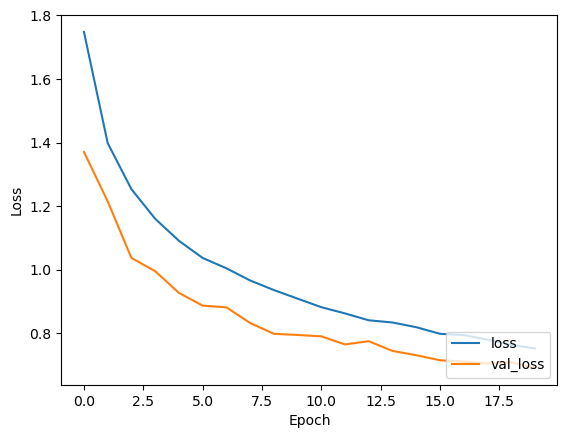

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

# Step 3 : Model Evaluation

## Evaluate trained model on test set

In [21]:
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 2s - loss: 0.7273 - accuracy: 0.7481 - 2s/epoch - 6ms/step
Test accuracy: 0.7480999827384949


In [22]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [23]:
y_pred

array([[1.3917495e-01, 1.5569514e-02, 2.8910911e-01, ..., 8.8319294e-02,
        5.3537720e-01, 1.5802136e-02],
       [9.8666996e-01, 9.9861217e-01, 8.3407294e-03, ..., 2.5089823e-05,
        9.9985659e-01, 8.1570464e-01],
       [8.7215906e-01, 9.2641449e-01, 3.9408576e-02, ..., 1.3976356e-02,
        9.8673189e-01, 3.1493580e-01],
       ...,
       [9.3058534e-03, 9.6752883e-05, 9.5078248e-01, ..., 7.7728748e-01,
        3.3801170e-03, 1.2823029e-03],
       [9.3790388e-01, 8.6076880e-01, 4.1700798e-01, ..., 1.6046800e-01,
        1.1775072e-01, 3.2884389e-02],
       [1.9607677e-03, 2.9737846e-05, 7.3649406e-01, ..., 9.9991095e-01,
        2.5513637e-05, 7.0861308e-05]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)


## Plot Confusion Matrix and Calculate evaluation metrices 

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

cm =confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion matrix:",cm)
print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion matrix: [[803  10  39  18   9   1   5  18  65  32]
 [ 21 855   5   6   3   3   6   5  26  70]
 [ 78   3 634  51  83  68  36  33  10   4]
 [ 22   2  79 574  55 167  41  32  21   7]
 [ 21   0  71  69 686  28  23  89  12   1]
 [ 13   2  53 173  34 658   8  51   7   1]
 [ 12   4  68  68  40  22 772   8   4   2]
 [ 10   2  41  35  43  57   1 800   6   5]
 [ 50  21   8  14   4   4   2   3 870  24]
 [ 28  64   7  20   1   3   6  13  29 829]]
Accuracy: 0.7481
Precision: 0.7500019001915046
Recall: 0.7481
F1 Score: 0.7485727477310437


## Visualize the Performance evaluation metrics

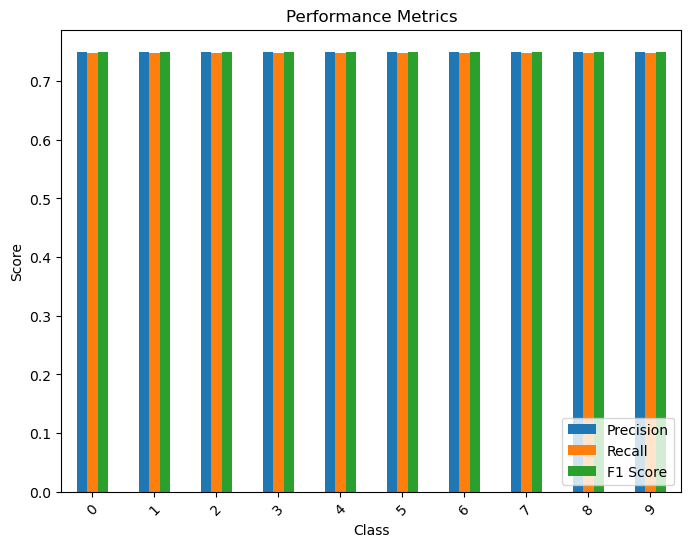

,Precision,Recall,F1 Score
0,0.750002,0.7481,0.748573
1,0.750002,0.7481,0.748573
2,0.750002,0.7481,0.748573
3,0.750002,0.7481,0.748573
4,0.750002,0.7481,0.748573
5,0.750002,0.7481,0.748573
6,0.750002,0.7481,0.748573
7,0.750002,0.7481,0.748573
8,0.750002,0.7481,0.748573
9,0.750002,0.7481,0.748573


In [26]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1}, index=[0,1,2,3,4,5,6,7,8,9])

# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(8, 6))
plt.title('Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

# Display the metrics in a table
metrics_df

# Step 4 : Overfitting Analysis 

### We use Droupout layers above to prevent from overfitting

## Monitor the training and validation curves and loss curves to identify sign of overfitting

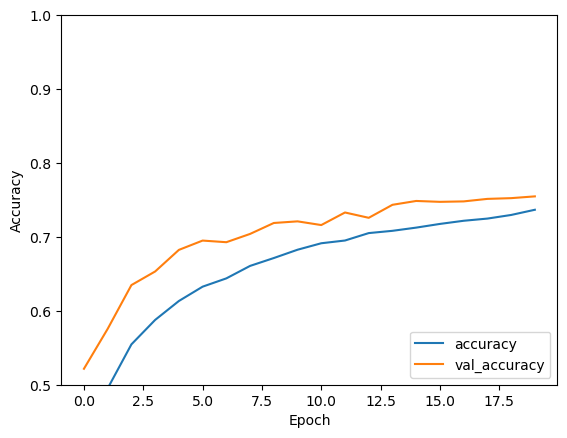

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

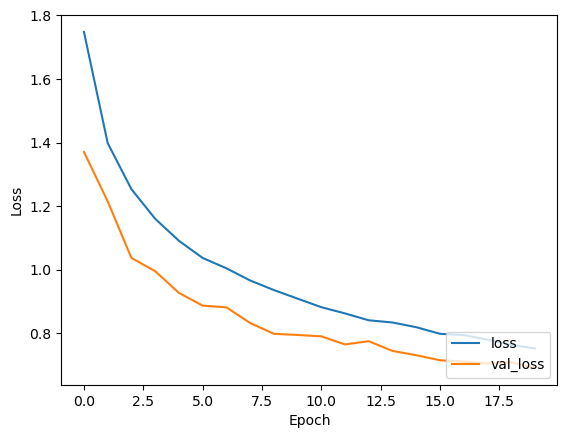

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

### After Applying Dropout layer , It seems good like we see that from above plot that training and validation accuracy are almost same therefore this is good fit model

## Compare the model performance on training and test sets to ensure a reasonable level of generalization.

In [29]:
train_loss, train_acc = cnn.evaluate(x_train, y_train, verbose=2)
print("Train_loss:", train_loss)
print("Train accuracy:", train_acc)

2023-07-07 01:29:14.629352: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 - 10s - loss: 0.5511 - accuracy: 0.8140 - 10s/epoch - 6ms/step
Train_loss: 0.5511135458946228
Train accuracy: 0.8139600157737732


In [30]:
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=2)
print("Test_loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 - 2s - loss: 0.7273 - accuracy: 0.7481 - 2s/epoch - 6ms/step
Test_loss: 0.7273198366165161
Test accuracy: 0.7480999827384949


### Therfore we see that traing and test set accuracy are pretty good. Hence,this model is pretty good train to predict the labels correctly.